#**About Dataset**

price price in US dollars (\$326--\$18,823)

carat weight of the diamond (0.2--5.01)

cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color diamond colour, from J (worst) to D (best)

clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x length in mm (0--10.74)

y width in mm (0--58.9)

z depth in mm (0--31.8)

depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table width of top of diamond relative to widest point (43--95)

#**Get data**

In [35]:
import pandas as pd
import numpy as np

In [36]:
train_df=pd.read_csv('/content/train.csv')
train_df.head()
# Read the csv file, store it in the variable (train_df), and display the first five rows

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [37]:
test_df=pd.read_csv('/content/test.csv')
test_df.head()
# Read the csv file, store it in the variable (test_df), and display the first five rows

,Id,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.34,Ideal,G,VVS2,61.1,57.0,4.52,4.48,2.75
1,2,0.71,Premium,E,VS2,62.7,58.0,5.74,5.68,3.58
2,3,0.44,Very Good,I,VS1,62.8,56.0,4.83,4.88,3.05
3,4,0.81,Premium,E,SI2,60.1,59.0,6.09,6.03,3.65
4,5,0.40,Ideal,G,VVS1,61.2,56.0,4.74,4.80,2.92


#**Data Preprocessing:**

In [38]:
print("train_df shape :",train_df.shape)
print("test_df shape :",test_df.shape)
# show the shape of : train_df, test_df

train_df shape : (43152, 11)
test_df shape : (10788, 10)


In [39]:
print("train_df shape :")
print(train_df.info())
print("\n\ntest_df shape :")
print(test_df.info())
#show information about (train_df,test_df) including index type, columns, non-null values, and memory usage

train_df shape :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43152 non-null  int64  
 1   carat    43152 non-null  float64
 2   cut      43152 non-null  object 
 3   color    43152 non-null  object 
 4   clarity  43152 non-null  object 
 5   depth    43152 non-null  float64
 6   table    43152 non-null  float64
 7   price    43152 non-null  int64  
 8   x        43152 non-null  float64
 9   y        43152 non-null  float64
 10  z        43152 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB
None


test_df shape :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10788 entries, 0 to 10787
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       10788 non-null  int64  
 1   carat    10788 non-null  float64
 2   cut      10788 non-null  obje

In [40]:
print("train_df",train_df.isnull().sum())
print("\n\ntest_df",test_df.isnull().sum())
#show the sum of missing values ​​for each column in train_df,test_df

train_df Id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


test_df Id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64


In [41]:
train_df.describe()
# summary statistics for train_df (count, max, min, mean, std)

,Id,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,21576.500000,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,12457.053745,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,10788.750000,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,21576.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,32364.250000,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,43152.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [42]:
# note that the smallest value in the columns x, y, z is equal to zero, and this is illogical. We will address it in Feature Engineering .

array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'depth'}>],
       [<Axes: title={'center': 'table'}>,
        <Axes: title={'center': 'price'}>, <Axes: title={'center': 'x'}>],
       [<Axes: title={'center': 'y'}>, <Axes: title={'center': 'z'}>,
        <Axes: >]], dtype=object)

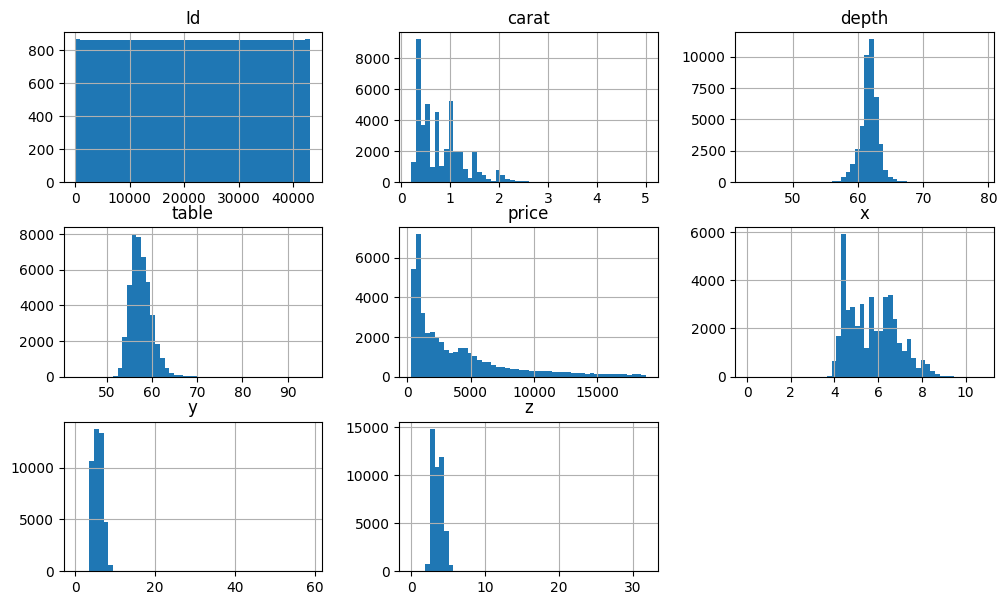

In [43]:
import matplotlib.pyplot as plt
train_df.hist(bins=50, figsize=(12,7))
#I used hist to representation of the distribution of data

#**Exploratory Data Analysis (EDA):**

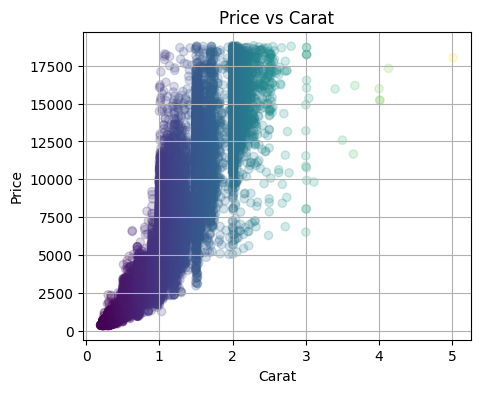

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 4))
plt.scatter(train_df['carat'],train_df['price'],c=train_df['carat'], alpha=0.2,cmap='viridis')
plt.title('Price vs Carat')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.grid(True)
plt.show()
#I used scatter to illustrate the relationship between price and weight(carat) of diamonds

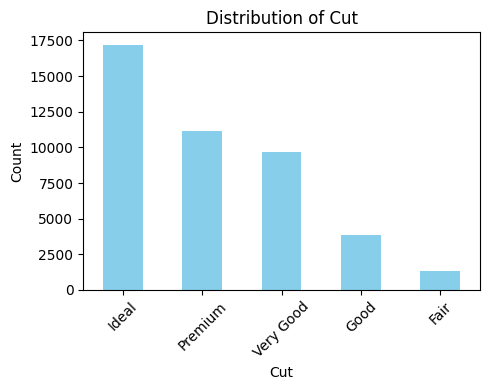

In [45]:
plt.figure(figsize=(5, 4))
train_df['cut'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Cut')
plt.xlabel('Cut')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

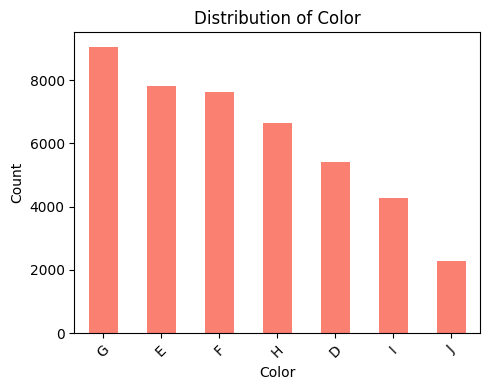

In [46]:
plt.figure(figsize=(5,4))
train_df['color'].value_counts().plot(kind='bar', color='salmon')
plt.title('Distribution of Color')
plt.xlabel('Color')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


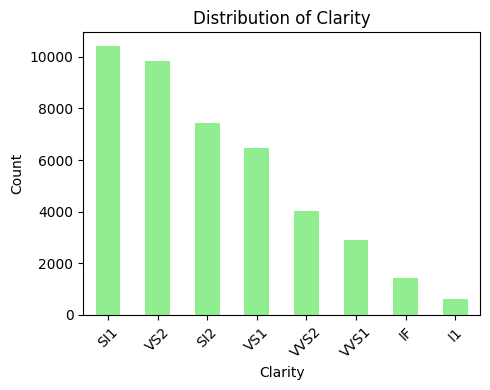

In [47]:
plt.figure(figsize=(5,4))
train_df['clarity'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Distribution of Clarity')
plt.xlabel('Clarity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

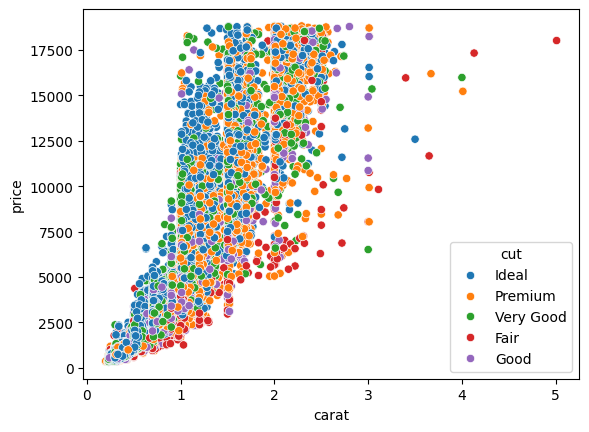

In [48]:
import seaborn as sns
sns.scatterplot(x='carat', y='price', data=train_df,hue='cut')
plt.show()

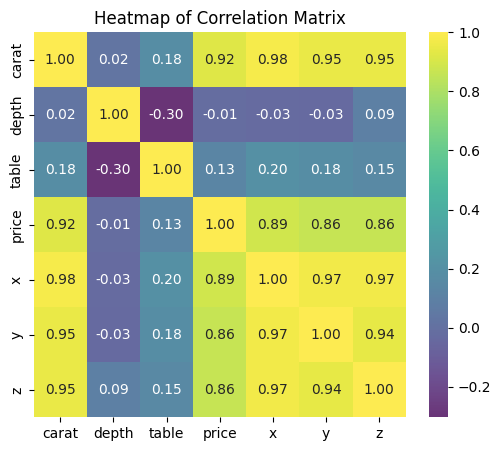

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = train_df[['carat','depth','table','price','x','y','z']].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True,cmap='viridis', fmt=".2f",alpha=.8)
plt.title('Heatmap of Correlation Matrix')
plt.show()


array([[<Axes: xlabel='carat', ylabel='carat'>,
        <Axes: xlabel='x', ylabel='carat'>,
        <Axes: xlabel='y', ylabel='carat'>,
        <Axes: xlabel='z', ylabel='carat'>,
        <Axes: xlabel='price', ylabel='carat'>],
       [<Axes: xlabel='carat', ylabel='x'>,
        <Axes: xlabel='x', ylabel='x'>, <Axes: xlabel='y', ylabel='x'>,
        <Axes: xlabel='z', ylabel='x'>,
        <Axes: xlabel='price', ylabel='x'>],
       [<Axes: xlabel='carat', ylabel='y'>,
        <Axes: xlabel='x', ylabel='y'>, <Axes: xlabel='y', ylabel='y'>,
        <Axes: xlabel='z', ylabel='y'>,
        <Axes: xlabel='price', ylabel='y'>],
       [<Axes: xlabel='carat', ylabel='z'>,
        <Axes: xlabel='x', ylabel='z'>, <Axes: xlabel='y', ylabel='z'>,
        <Axes: xlabel='z', ylabel='z'>,
        <Axes: xlabel='price', ylabel='z'>],
       [<Axes: xlabel='carat', ylabel='price'>,
        <Axes: xlabel='x', ylabel='price'>,
        <Axes: xlabel='y', ylabel='price'>,
        <Axes: xlabel='z', ylabe

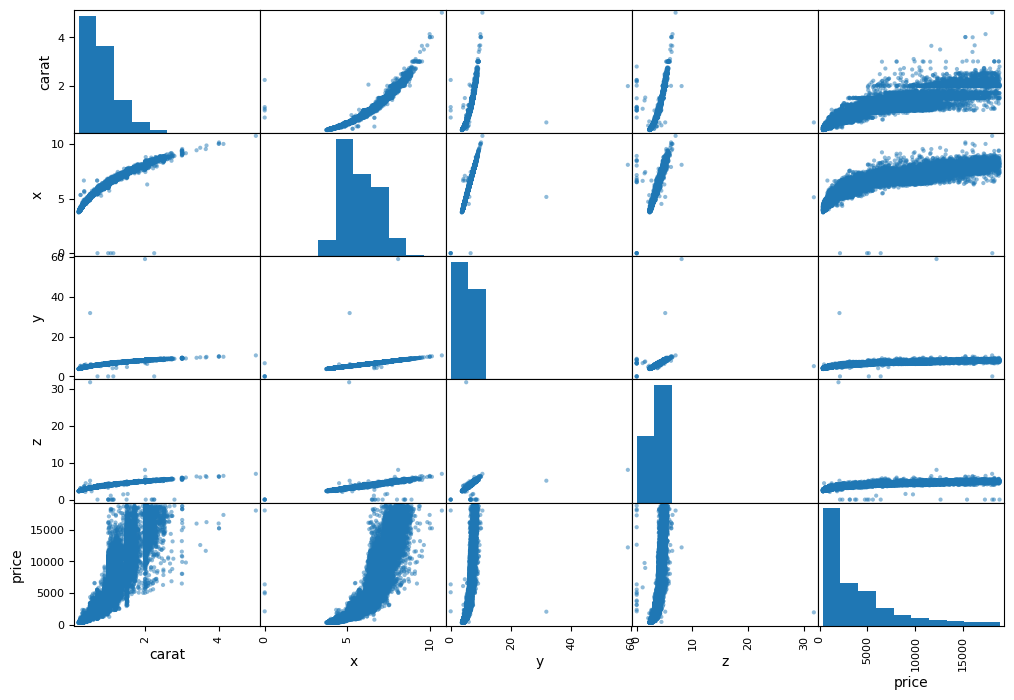

In [50]:
from pandas.plotting import scatter_matrix
attributes = ["carat", "x", "y", "z","price"]
scatter_matrix(train_df[attributes], figsize=(12,8))

#**Feature Engineering:**

In [51]:
train_df.describe()

,Id,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,21576.500000,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,12457.053745,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,10788.750000,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,21576.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,32364.250000,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,43152.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [52]:
num_zero_x = (train_df['x'] == 0).sum()
num_zero_y = (train_df['y'] == 0).sum()
num_zero_z = (train_df['z'] == 0).sum()

print("number of zero in x:", num_zero_x)
print("number of zero in y:", num_zero_y)
print("number of zero in z:", num_zero_z)
train_df.shape

number of zero in x: 5
number of zero in y: 4
number of zero in z: 17


(43152, 11)

In [53]:
mean_x = train_df.loc[train_df['y'] != 0, 'y'].mean()
train_df['x'] = train_df['x'].replace(0, mean_x)

mean_x = train_df.loc[train_df['y'] != 0, 'y'].mean()
train_df['y'] = train_df['y'].replace(0, mean_x)

mean_x = train_df.loc[train_df['z'] != 0, 'z'].mean()
train_df['z'] = train_df['z'].replace(0, mean_x)

In [54]:
num_zero_x = (train_df['x'] == 0).sum()
num_zero_y = (train_df['y'] == 0).sum()
num_zero_z = (train_df['z'] == 0).sum()

print("number of zero in x:", num_zero_x)
print("number of zero in y:", num_zero_y)
print("number of zero in z:", num_zero_z)
train_df.shape

number of zero in x: 0
number of zero in y: 0
number of zero in z: 0


(43152, 11)

In [55]:
#train_df['size'] = train_df['x'] * train_df['y'] * train_df['z']
#test_df['size'] = test_df['x'] * test_df['y'] * test_df['z']

In [56]:
train_df.describe()

,Id,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,21576.500000,0.797855,61.747177,57.458347,3929.491912,5.732233,5.735549,3.539962
std,12457.053745,0.473594,1.435454,2.233904,3985.527795,1.119580,1.147481,0.704745
min,1.000000,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,10788.750000,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,21576.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,32364.250000,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,43152.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [57]:
#plt.figure(figsize=(5, 4))
#plt.scatter(train_df['size'], train_df['price'],c=train_df['carat'],cmap='viridis', alpha=0.5)
#plt.xlim(0, 1000)
#plt.title('Price vs size')
#plt.xlabel('size')
#plt.ylabel('Price')
#plt.colorbar(label='Carat')
#plt.grid(True)
#plt.show()
#I used scatter to illustrate the relationship between price and size of diamonds

In [58]:
#train_df.drop(columns=['x', 'y', 'z'], inplace=True)
#test_df.drop(columns=['x', 'y', 'z'], inplace=True)

#**Preparing Data**

In [59]:
labels = train_df["price"].copy()

In [60]:
features =train_df.drop(['price','Id'], axis=1)

In [61]:
features

,carat,cut,color,clarity,depth,table,x,y,z
0,1.06,Ideal,I,SI2,61.8,57.0,6.57,6.60,4.07
1,1.51,Premium,G,VVS2,60.9,58.0,7.38,7.42,4.51
2,0.32,Ideal,F,VS2,61.3,56.0,4.43,4.41,2.71
3,0.53,Ideal,G,VS2,61.2,56.0,5.19,5.22,3.19
4,0.70,Premium,H,VVS2,61.0,57.0,5.76,5.72,3.50
...,...,...,...,...,...,...,...,...,...
43147,0.52,Ideal,E,VS2,61.5,56.0,5.16,5.18,3.18
43148,0.72,Very Good,D,VS2,62.1,59.0,5.70,5.73,3.55
43149,0.44,Premium,I,VVS1,61.5,58.0,4.95,4.87,3.02
43150,0.31,Premium,E,VS1,60.2,58.0,4.38,4.43,2.65


In [62]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

In [63]:
num_features=features.drop(['color','cut','clarity'],axis=1)
num_features

,carat,depth,table,x,y,z
0,1.06,61.8,57.0,6.57,6.60,4.07
1,1.51,60.9,58.0,7.38,7.42,4.51
2,0.32,61.3,56.0,4.43,4.41,2.71
3,0.53,61.2,56.0,5.19,5.22,3.19
4,0.70,61.0,57.0,5.76,5.72,3.50
...,...,...,...,...,...,...
43147,0.52,61.5,56.0,5.16,5.18,3.18
43148,0.72,62.1,59.0,5.70,5.73,3.55
43149,0.44,61.5,58.0,4.95,4.87,3.02
43150,0.31,60.2,58.0,4.38,4.43,2.65


In [64]:
num_pipeline=Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
            ])

num_pipeline_2 = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('minMax_scaler', MinMaxScaler(feature_range=(0, 1))),
            ])

In [65]:
num_attribs=list(num_features)

In [66]:
from sklearn.preprocessing import OrdinalEncoder

In [67]:
cut_pipeline = Pipeline([
     ('cut_imputer',SimpleImputer(strategy="most_frequent")),
    ('cut_encoder', OrdinalEncoder(categories=[['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']]))
])

# Define the pipeline for the 'clarity' feature
clarity_pipeline = Pipeline([
    ('clarity_imputer',SimpleImputer(strategy="most_frequent")),
    ('clarity_encoder', OrdinalEncoder(categories=[['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']]))
])

# Define the pipeline for the 'color' feature
color_pipeline = Pipeline([
    ('color_imputer',SimpleImputer(strategy="most_frequent")),
    ('color_encoder', OrdinalEncoder(categories=[['J','I','H', 'G', 'F', 'E', 'D']]))
])


In [68]:
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cut", cut_pipeline, ["cut"]),
    ("clarity", clarity_pipeline, ["clarity"]),
    ("color", color_pipeline, ["color"])
])

full_pipeline_2 = ColumnTransformer([
    ("num", num_pipeline_2, num_attribs),
    ("cut", cut_pipeline, ["cut"]),
    ("clarity", clarity_pipeline, ["clarity"]),
    ("color", color_pipeline, ["color"])
])

full_pipeline_3 = ColumnTransformer([
    ("num", SimpleImputer(strategy="median"), num_attribs),
    ("cut", cut_pipeline, ["cut"]),
    ("clarity", clarity_pipeline, ["clarity"]),
    ("color", color_pipeline, ["color"])
])

In [69]:
prepared_features = full_pipeline.fit_transform(features)
prepared_features_2 = full_pipeline_2.fit_transform(features)
prepared_features_3 = full_pipeline_3.fit_transform(features)


In [70]:
prepered = pd.DataFrame(
    prepared_features,
    columns=full_pipeline.get_feature_names_out(),
    index=train_df.index)
prepered.head(5)

,num__carat,num__depth,num__table,num__x,num__y,num__z,cut__cut,clarity__clarity,color__color
0,0.553529,0.036799,-0.205180,0.748296,0.753355,0.752107,4.0,1.0,1.0
1,1.503722,-0.590188,0.242472,1.471790,1.467973,1.376454,3.0,5.0,3.0
2,-1.009010,-0.311527,-0.652832,-1.163157,-1.155195,-1.177691,4.0,3.0,4.0
3,-0.565586,-0.381192,-0.652832,-0.484323,-0.449293,-0.496586,4.0,3.0,3.0
4,-0.206625,-0.520523,-0.205180,0.024802,-0.013551,-0.056705,3.0,5.0,2.0


In [71]:
prepered3 = pd.DataFrame(
    prepared_features_3,
    columns=full_pipeline_3.get_feature_names_out(),
    index=train_df.index)
prepered3.head(5)

,num__carat,num__depth,num__table,num__x,num__y,num__z,cut__cut,clarity__clarity,color__color
0,1.06,61.8,57.0,6.57,6.60,4.07,4.0,1.0,1.0
1,1.51,60.9,58.0,7.38,7.42,4.51,3.0,5.0,3.0
2,0.32,61.3,56.0,4.43,4.41,2.71,4.0,3.0,4.0
3,0.53,61.2,56.0,5.19,5.22,3.19,4.0,3.0,3.0
4,0.70,61.0,57.0,5.76,5.72,3.50,3.0,5.0,2.0


In [72]:
prepered2 = pd.DataFrame(
    prepared_features_3,
    columns=full_pipeline.get_feature_names_out(),
    index=train_df.index)
prepered2.head(5)

,num__carat,num__depth,num__table,num__x,num__y,num__z,cut__cut,clarity__clarity,color__color
0,1.06,61.8,57.0,6.57,6.60,4.07,4.0,1.0,1.0
1,1.51,60.9,58.0,7.38,7.42,4.51,3.0,5.0,3.0
2,0.32,61.3,56.0,4.43,4.41,2.71,4.0,3.0,4.0
3,0.53,61.2,56.0,5.19,5.22,3.19,4.0,3.0,3.0
4,0.70,61.0,57.0,5.76,5.72,3.50,3.0,5.0,2.0


#**Models Selection and Training and Evaluation :**

In [73]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
import xgboost as xg

In [74]:
test_features=test_df.drop('Id',axis=1)

In [75]:
test_features_prepared = full_pipeline.transform(test_features)
test_features_prepared_2 = full_pipeline_2.transform(test_features)
test_features_prepared_3 = full_pipeline_3.transform(test_features)

In [76]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


#**Linear Regression**

In [78]:
lin_reg=LinearRegression()
lin_reg.fit(prepared_features , labels)

predictions= lin_reg.predict(prepared_features)
lin_mse= mean_squared_error(labels, predictions)
lin_rmse= np.sqrt(lin_mse)
print('RMSE:', lin_rmse)

# Apply cross-validation
cv_scores = cross_val_score(lin_reg,prepared_features , labels, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)
print('Cross-validation RMSE scores:', cv_rmse_scores)
print('Mean CV RMSE:', cv_rmse_scores.mean())

RMSE: 1208.8053117172317
Cross-validation RMSE scores: [1183.54320004 1215.63774379 1223.63331825 1241.16556469 1555.59231066]
Mean CV RMSE: 1283.9144274860148


In [79]:
lin_prediction_Ts=lin_reg.predict(test_features_prepared)
lin_prediction_Ts

array([ 1099.92015629,  3361.48204802,   401.97022339, ...,
        5152.65744144,  5951.64116475, 14113.80785549])

In [80]:
submission = test_df[["Id"]]
submission['price']=lin_prediction_Ts
submission.to_csv("lin_submission.csv" ,index = None)

<ipython-input-80-529245ee4a2f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['price']=lin_prediction_Ts


#**Decision Tree Regressor**

In [81]:
from sklearn.tree import DecisionTreeRegressor

tree_reg= DecisionTreeRegressor()
tree_reg.fit(prepared_features, labels)

Diamonds_predictions=tree_reg.predict(prepared_features)
tree_mse = mean_squared_error(labels , Diamonds_predictions)
tree_rmse= np.sqrt(tree_mse)
print('tree_rmse',tree_rmse)

# Apply cross-validation
cv_scores = cross_val_score(tree_reg, prepared_features, labels, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)
print('Cross-validation RMSE scores:', cv_rmse_scores)
print('Mean CV RMSE:', cv_rmse_scores.mean())

tree_rmse 8.613423979024963
Cross-validation RMSE scores: [738.30091648 738.19505842 744.52582947 745.22488831 743.25768454]
Mean CV RMSE: 741.9008754431875


In [82]:
tree_test_predict=tree_reg.predict(test_features_prepared)
submission = test_df[["Id"]]
submission['price']=tree_test_predict
submission.to_csv("tree_submission.csv" ,index = None)

<ipython-input-82-335b01f9785b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['price']=tree_test_predict


#**Random Forest Regressor**

In [101]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(prepared_features , labels)

forets_pridictions=forest_reg.predict(prepared_features)
forest_mse = mean_squared_error(labels ,forets_pridictions )
forest_rmse = np.sqrt(forest_mse)

print("rmse:", forest_rmse)

# Apply cross-validation
cv_scores = cross_val_score(forest_reg, prepared_features , labels, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)
print('Cross-validation RMSE scores:', cv_rmse_scores)
print('Mean CV RMSE:', cv_rmse_scores.mean())

rmse: 203.33351884778978
Cross-validation RMSE scores: [547.14475123 555.52209212 559.66095448 549.43607948 549.82434341]
Mean CV RMSE: 552.3176441439967


In [ ]:
forest_test_predict = forest_reg.predict(test_features_prepared)
submission = test_df[["Id"]]
submission['price']=forets_cv_pridictions
submission.to_csv("rf_submission.csv" ,index = None)

#**Gradient Boosting Regressor**

In [85]:
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor( random_state=42)
gb_model.fit(prepared_features , labels)
y_pred_gb = gb_model.predict(prepared_features)
mse_gb = mean_squared_error(labels, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
print("Gradient Boosting RMSE:", rmse_gb)

cv_scores = cross_val_score(gb_model, prepared_features , labels, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)
print('Cross-validation RMSE scores:', cv_rmse_scores)
print('Mean CV RMSE:', cv_rmse_scores.mean())

Gradient Boosting RMSE: 597.971459783782
Cross-validation RMSE scores: [615.90564793 624.8113942  630.29610303 609.75358765 623.86420023]
Mean CV RMSE: 620.9261866086777


In [86]:
Gradient_test_predict = gb_model.predict(test_features_prepared)
submission = test_df[["Id"]]
submission['price']=Gradient_test_predict
submission.to_csv("Gradient_submission.csv" ,index = None)

<ipython-input-86-88ad1e4fb10a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['price']=Gradient_test_predict


#**XGBoost**

In [87]:
features_copy = features.copy()
cats = features_copy.select_dtypes(exclude=np.number).columns.tolist()

# Convert to Pandas category
for col in cats:
   features_copy[col] = features_copy[col].astype('category')
dtrain_reg = xg.DMatrix(features_copy, labels, enable_categorical=True)
params = {"objective": "reg:squarederror"}

xgb_r = xg.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=100,
)

xgb_pridictions=xgb_r.predict(dtrain_reg)
xgb_mse = mean_squared_error(labels ,xgb_pridictions)
xgb_rmse = np.sqrt(xgb_mse)
xgb_rmse

381.5844424805617

In [88]:
features_test_copy = test_features.copy()
cats = features_test_copy.select_dtypes(exclude=np.number).columns.tolist()

# Convert to Pandas category
for col in cats:
   features_test_copy[col] = features_test_copy[col].astype('category')
dtest_reg = xg.DMatrix(features_test_copy,None, enable_categorical=True)

xgb_test_pridictions = xgb_r.predict(dtest_reg)
submission = test_df[["Id"]]
submission['price']=xgb_test_pridictions
submission.to_csv("xgb_submission.csv" ,index = None)

<ipython-input-88-b8d43158e3bb>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['price']=xgb_test_pridictions


In [89]:
from xgboost import XGBRegressor
xgb_r = XGBRegressor()
xgb_r.fit(prepared_features_2, labels)
xgb_r_predictions = xgb_r.predict(prepared_features_2)

#RMSE
xgb_r_mse = mean_squared_error(labels, xgb_r_predictions)
xgb_r_rmse = np.sqrt(xgb_r_mse)
print(f"XGBoost Regressor RMSE: {xgb_r_rmse}")

xgb_r_test_predict = xgb_r.predict(test_features_prepared)
submission = test_df[["Id"]]
submission['price']=xgb_r_test_predict
submission.to_csv("rf_submission.csv" ,index = None)

XGBoost Regressor RMSE: 397.8964711087657


<ipython-input-89-c6df39c96861>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['price']=xgb_r_test_predict


#**LGBM**

In [90]:
lgbm = LGBMRegressor()
lgbm.fit(prepared_features_2 , labels)

lgbm_pridictions=lgbm.predict(prepared_features_2)
lgbm_mse = mean_squared_error(labels ,lgbm_pridictions )
lgbm_rmse = np.sqrt(lgbm_mse)
lgbm_rmse

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001815 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1272
[LightGBM] [Info] Number of data points in the train set: 43152, number of used features: 9
[LightGBM] [Info] Start training from score 3929.491912


471.0348674634669

In [91]:
lgbm_test_predict = lgbm.predict(test_features_prepared)
submission = test_df[["Id"]]
submission['price']=lgbm_test_predict
submission.to_csv("lgbm_submission.csv" ,index = None)

<ipython-input-91-081bc9df72d7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['price']=lgbm_test_predict


#**Fine tune the model**

In [103]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters grid
param_grid = {
    'learning_rate': [0.01,0.02],
    'n_estimators': [800,900, 1000],
    'max_depth': [8,9,10],

}

# Create Grid Search CV object
grid_search = GridSearchCV(estimator=xgb_r,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           )

# Fit the Grid Search to find the best hyperparameters
grid_search.fit(prepared_features_3 , labels)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model
best_model = grid_search.best_estimator_
best_model.fit(prepared_features_3 , labels)
# Make predictions on the testing set using the best model
y_pred = best_model.predict(test_features_prepared_3)



Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 1000}


In [105]:
submission = test_df[["Id"]]
submission['price']=y_pred
submission.to_csv("best_model_submission.csv" ,index = None)

<ipython-input-105-66d667b48e1a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['price']=y_pred
